In [1]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import random;import time, signal


In [2]:
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [3]:
# Reload all scans in this round! 
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P2R7/P2_int_221209/'; 
# Initialize the big dict:
Targets = [
    "Int_1_scan_Dint","Int_2_scan_k_LiP","Int_3_scan_pLAM_Neg",
    "Int_4_scan_pLAM_Pos","Int_5_scan_Crack_Neg",
    "Int_6_scan_Crack_Pos",]
Scan_Num = [6,6,6,6,6,6]
Round_P2_int_221209 = {}
for target,scan_num in zip(Targets,Scan_Num):
    Round_P2_int_221209[target] = {}
    Scans = np.arange(1,scan_num+1,1).tolist()
    for scan in Scans:
        Round_P2_int_221209[target][str(scan)]={}
        try:
            Round_P2_int_221209[target][str(scan)] = loadmat( 
            BasicPath  +   target+ "/" + str(scan) + "/" 
            + str(scan)+ "-StructDara_for_Mat.mat")
        except:
            print(f"Nothing in {target}, Scan {scan}")

In [6]:
def Plot_CycRPT_Scans(Round,target,Scans,Labels,BasicPath,fs,  dpi,Save):
    font = {'family' : 'DejaVu Sans','size': fs}
    mpl.rc('font', **font)
    # color='b',linewidth=2,  linestyle=':',marker = 'o',markerfacecolor='r',markersize = 10
    fig, axs = plt.subplots(2,2, figsize=(11,8.5),tight_layout=True)
    for scan,label in zip(Scans,Labels):
        #linestyle=':';marker = 'o';color='b'
        axs[0,0].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["Discharge capacity [A.h]"][0],
            '-^',  label=label)
        axs[0,1].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["CDend Loss of capacity to lithium plating [A.h]"][0]
            +Round[target][str(scan)]["CDend Loss of capacity to SEI [A.h]"][0]
            +Round[target][str(scan)]["CDend Loss of capacity to SEI on cracks [A.h]"][0],
            '-^',  label=label)
        axs[1,0].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["CDend Negative electrode capacity [A.h]"][0][0]
            -Round[target][str(scan)]["CDend Negative electrode capacity [A.h]"][0],
            '-^',  label=label)
        axs[1,1].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["CDend Positive electrode capacity [A.h]"][0][0]
            -Round[target][str(scan)]["CDend Positive electrode capacity [A.h]"][0],
            '-^',  label=label)
        axs[0,0].set_title("Discharge capacity",   fontdict={'family':'DejaVu Sans','size':fs+1})
        axs[0,1].set_title("LLI",   fontdict={'family':'DejaVu Sans','size':fs+1})
        axs[1,0].set_title("LAM Neg",   fontdict={'family':'DejaVu Sans','size':fs+1})
        axs[1,1].set_title("LAM Pos",   fontdict={'family':'DejaVu Sans','size':fs+1})
        for i in range(0,2):
            for j in range(0,2):
                axs[i,j].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
                axs[i,j].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
                axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1)
                axs[i,j].ticklabel_format( 
                    axis='y', style='sci',
                    scilimits=[0,1e-5], useOffset=None, 
                    useLocale=None, useMathText=None)
        axs[1,1].legend(prop={'family':'DejaVu Sans','size':fs-4},loc='best',frameon=False)
    if Save == True:
        plt.savefig(BasicPath + target+ "/" +  target+ "Cap_DMA.png", dpi=dpi)

In [18]:
def Plot_CycRPT_Scans_Dry(Round,target,Scans,Labels,Colors,Markers,Linestyles,BasicPath,fs,  dpi,Save):
    font = {'family' : 'DejaVu Sans','size': fs}
    mpl.rc('font', **font)
    # color='b',linewidth=2,  linestyle=':',marker = 'o',markerfacecolor='r',markersize = 10
    fig, axs = plt.subplots(2,2, figsize=(11,8.5),tight_layout=True)
    for scan,label,color,marker,linestyle in zip(Scans,Labels,Colors,Markers,Linestyles):
        #linestyle=':';marker = 'o';color='b'
        axs[0,0].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["Discharge capacity [A.h]"][0],
            color=color,marker=marker,linestyle=linestyle,  label=label)
        axs[0,1].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["CDend Loss of capacity to lithium plating [A.h]"][0]
            +Round[target][str(scan)]["CDend Loss of capacity to SEI [A.h]"][0]
            +Round[target][str(scan)]["CDend Loss of capacity to SEI on cracks [A.h]"][0],
            color=color,marker=marker,linestyle=linestyle,   label=label)
        axs[1,0].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["CDend Negative electrode capacity [A.h]"][0][0]
            -Round[target][str(scan)]["CDend Negative electrode capacity [A.h]"][0],
            color=color,marker=marker,linestyle=linestyle,   label=label)
        axs[1,1].plot(
            Round[target][str(scan)]["Cycle_RPT"][0],
            Round[target][str(scan)]["CDend Positive electrode capacity [A.h]"][0][0]
            -Round[target][str(scan)]["CDend Positive electrode capacity [A.h]"][0],
            color=color,marker=marker,linestyle=linestyle,   label=label)
        axs[0,0].set_title("Discharge capacity",   fontdict={'family':'DejaVu Sans','size':fs+1})
        axs[0,1].set_title("LLI",   fontdict={'family':'DejaVu Sans','size':fs+1})
        axs[1,0].set_title("LAM Neg",   fontdict={'family':'DejaVu Sans','size':fs+1})
        axs[1,1].set_title("LAM Pos",   fontdict={'family':'DejaVu Sans','size':fs+1})
        for i in range(0,2):
            for j in range(0,2):
                axs[i,j].set_xlabel("Cycle numbers",   fontdict={'family':'DejaVu Sans','size':fs})
                axs[i,j].set_ylabel("Capacity [A.h]",   fontdict={'family':'DejaVu Sans','size':fs})
                axs[i,j].tick_params(labelcolor='k', labelsize=fs, width=1)
                axs[i,j].ticklabel_format( 
                    axis='y', style='sci',
                    scilimits=[0,1e-5], useOffset=None, 
                    useLocale=None, useMathText=None)
        axs[1,1].legend(prop={'family':'DejaVu Sans','size':fs-4},loc='best',frameon=False)
    if Save == True:
        plt.savefig(BasicPath + target+ "/" +  target+ "Cap_DMA.png", dpi=dpi)

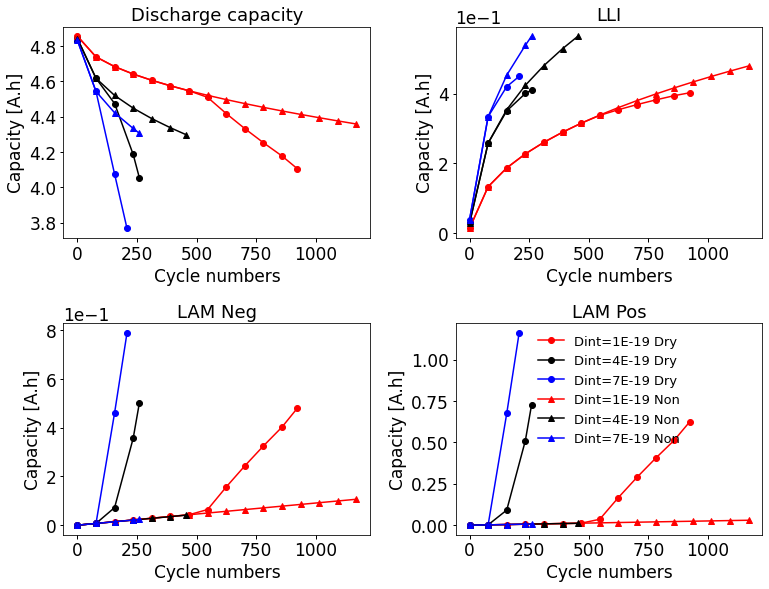

In [20]:
Scans = np.arange(1,6+1,1).tolist() # can be a self-defined list
Colors    = ["r","k","b","r","k","b",]
Markers   = ["o","o","o","^","^","^",]
Linestyles= ["-","-","-","-","-","-",]
Labels = [
    "Dint=1E-19 Dry","Dint=4E-19 Dry","Dint=7E-19 Dry",
    "Dint=1E-19 Non","Dint=4E-19 Non","Dint=7E-19 Non",]
target = "Int_1_scan_Dint"
Plot_CycRPT_Scans_Dry(
    Round_P2_int_221209,target,Scans,Labels,Colors,Markers,
    Linestyles,BasicPath,17,  200,Save=True)

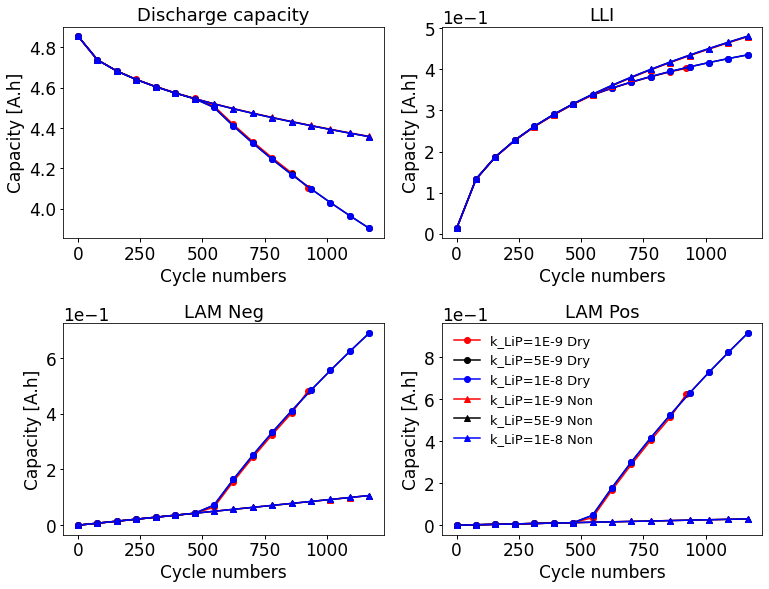

In [21]:
Scans = np.arange(1,6+1,1).tolist() # can be a self-defined list
Labels = [
    "k_LiP=1E-9 Dry","k_LiP=5E-9 Dry","k_LiP=1E-8 Dry",
    "k_LiP=1E-9 Non","k_LiP=5E-9 Non","k_LiP=1E-8 Non"]
Colors    = ["r","k","b","r","k","b",]
Markers   = ["o","o","o","^","^","^",]
Linestyles= ["-","-","-","-","-","-",]
target = "Int_2_scan_k_LiP"
Plot_CycRPT_Scans_Dry(
    Round_P2_int_221209,target,Scans,Labels,Colors,Markers,
    Linestyles,BasicPath,17,  200,Save=True)

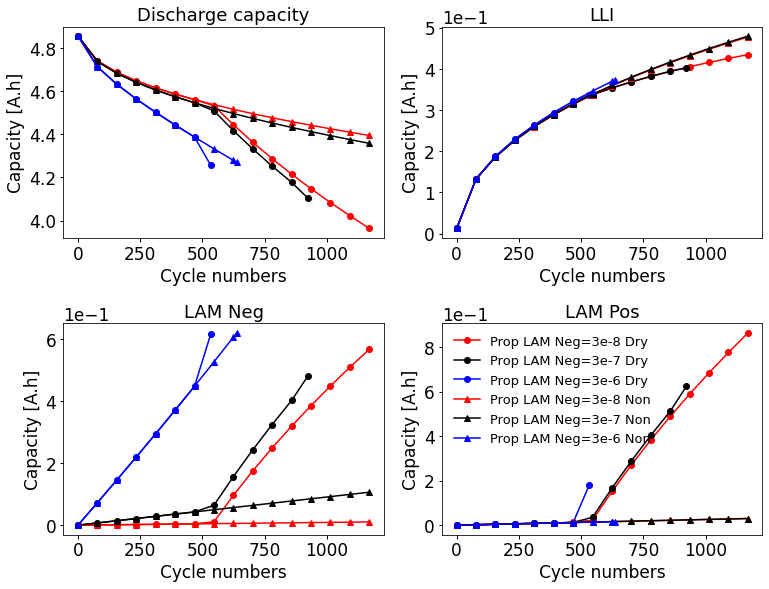

In [22]:
Scans = np.arange(1,6+1,1).tolist() # can be a self-defined list
Labels = [
    "Prop LAM Neg=3e-8 Dry","Prop LAM Neg=3e-7 Dry","Prop LAM Neg=3e-6 Dry",
    "Prop LAM Neg=3e-8 Non","Prop LAM Neg=3e-7 Non","Prop LAM Neg=3e-6 Non",]
Colors    = ["r","k","b","r","k","b",]
Markers   = ["o","o","o","^","^","^",]
Linestyles= ["-","-","-","-","-","-",]
target = "Int_3_scan_pLAM_Neg"
Plot_CycRPT_Scans_Dry(
    Round_P2_int_221209,target,Scans,Labels,Colors,Markers,
    Linestyles,BasicPath,17,  200,Save=True)

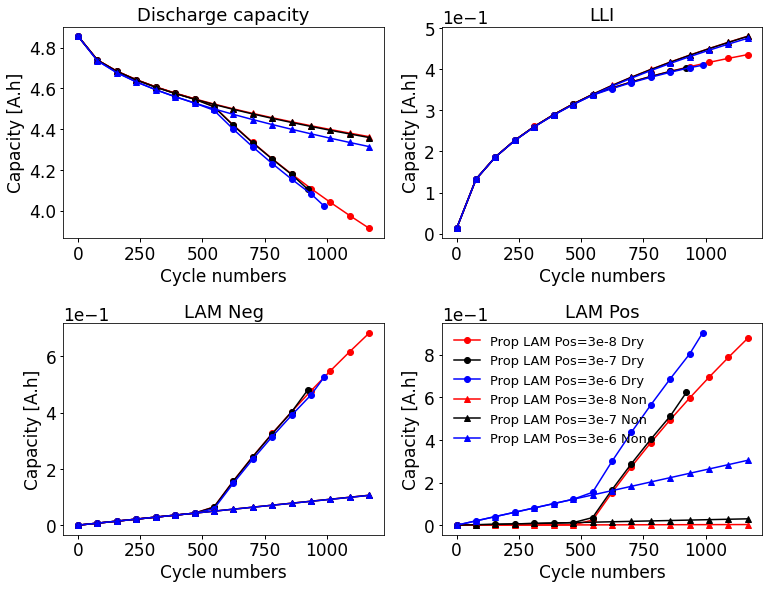

In [23]:
Scans = np.arange(1,6+1,1).tolist() # can be a self-defined list
Labels = [
    "Prop LAM Pos=3e-8 Dry","Prop LAM Pos=3e-7 Dry","Prop LAM Pos=3e-6 Dry",
    "Prop LAM Pos=3e-8 Non","Prop LAM Pos=3e-7 Non","Prop LAM Pos=3e-6 Non",]
Colors    = ["r","k","b","r","k","b",]
Markers   = ["o","o","o","^","^","^",]
Linestyles= ["-","-","-","-","-","-",]
target = "Int_4_scan_pLAM_Pos"
Plot_CycRPT_Scans_Dry(
    Round_P2_int_221209,target,Scans,Labels,Colors,Markers,
    Linestyles,BasicPath,17,  200,Save=True)

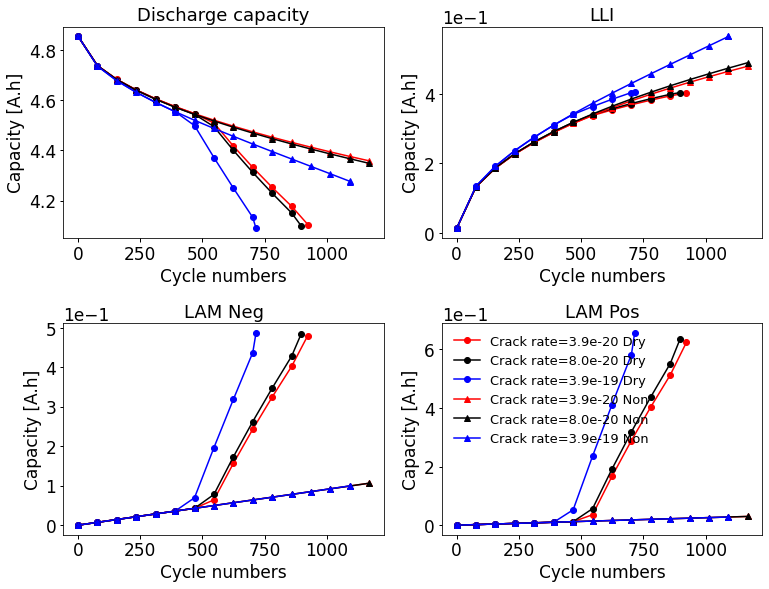

In [24]:
Scans = np.arange(1,6+1,1).tolist() # can be a self-defined list
Labels = [
    "Crack rate=3.9e-20 Dry","Crack rate=8.0e-20 Dry","Crack rate=3.9e-19 Dry",
    "Crack rate=3.9e-20 Non","Crack rate=8.0e-20 Non","Crack rate=3.9e-19 Non"]
Colors    = ["r","k","b","r","k","b",]
Markers   = ["o","o","o","^","^","^",]
Linestyles= ["-","-","-","-","-","-",]
target = "Int_5_scan_Crack_Neg"
Plot_CycRPT_Scans_Dry(
    Round_P2_int_221209,target,Scans,Labels,Colors,Markers,
    Linestyles,BasicPath,17,  200,Save=True)

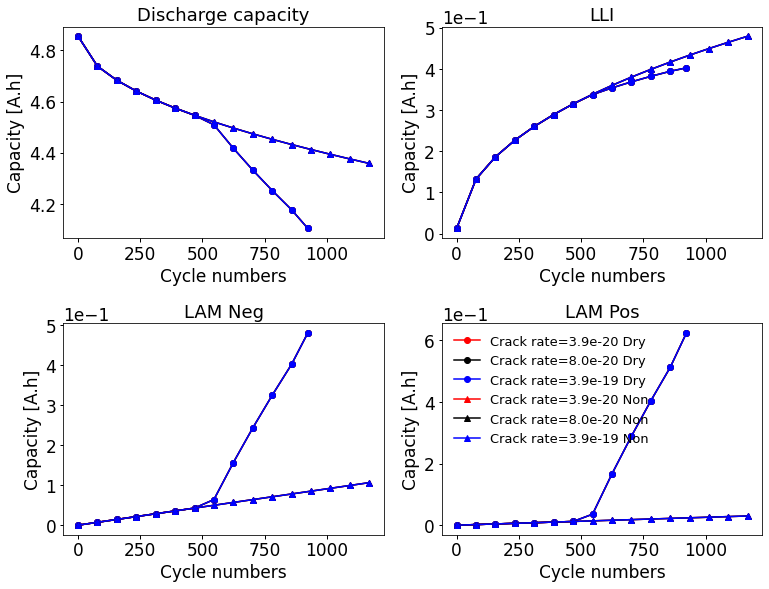

In [25]:
Scans = np.arange(1,6+1,1).tolist() # can be a self-defined list
Labels = [
    "Crack rate=3.9e-20 Dry","Crack rate=8.0e-20 Dry","Crack rate=3.9e-19 Dry",
    "Crack rate=3.9e-20 Non","Crack rate=8.0e-20 Non","Crack rate=3.9e-19 Non"]
Colors    = ["r","k","b","r","k","b",]
Markers   = ["o","o","o","^","^","^",]
Linestyles= ["-","-","-","-","-","-",]
target = "Int_6_scan_Crack_Pos"
Plot_CycRPT_Scans_Dry(
    Round_P2_int_221209,target,Scans,Labels,Colors,Markers,
    Linestyles,BasicPath,17,  200,Save=True)